# Exploring data with Python - real world data

In the last notebook, we looked at grades for our student data and investigated the data visually with histograms and box plots. Now we'll look into more complex cases, describe the data more fully, and discuss how to make basic comparisons between data.

### Real world data distributions

Previously, we looked at grades for our student data and estimated from this sample what the full population of grades might look like. Let's refresh our memory and take a look at this data again.

Run the code below to print out the data and make a histogram + box plot that shows the grades for our sample of students.

--2023-08-01 03:07:16--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.3’

grades.csv.3        100%[===================>]     322  --.-KB/s    in 0s      

2023-08-01 03:07:16 (23.6 MB/s) - ‘grades.csv.3’ saved [322/322]

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.5

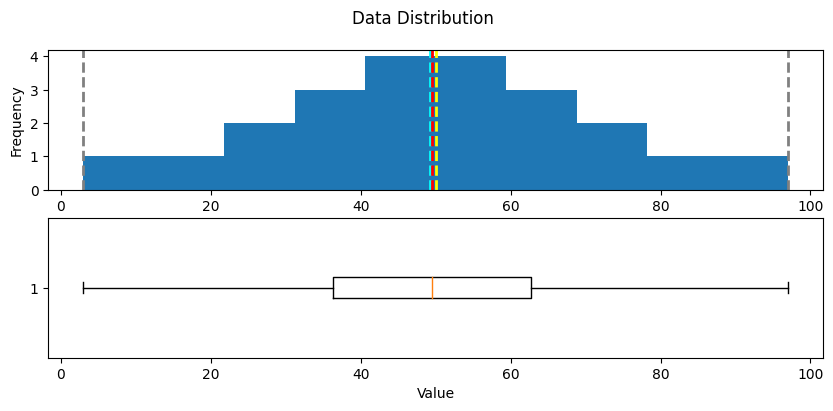

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

As you might recall, our data had the mean and mode at the center, with data spread symmetrically from there.

Now let's take a look at the distribution of the study hours data.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



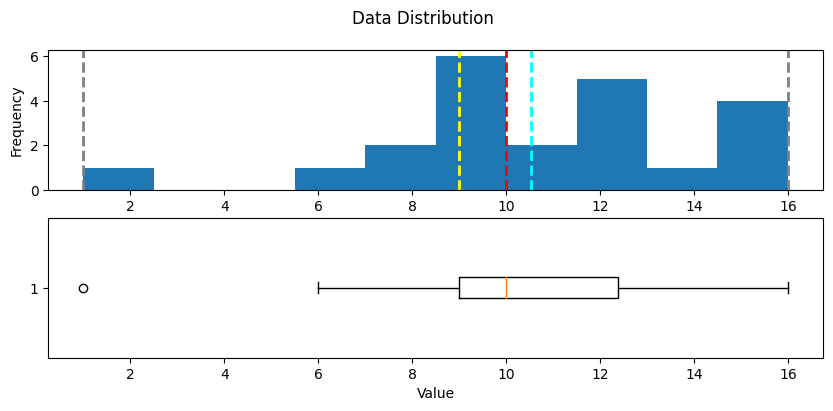

In [2]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an **o**, indicating that it is statistically an *outlier*&#8212;a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



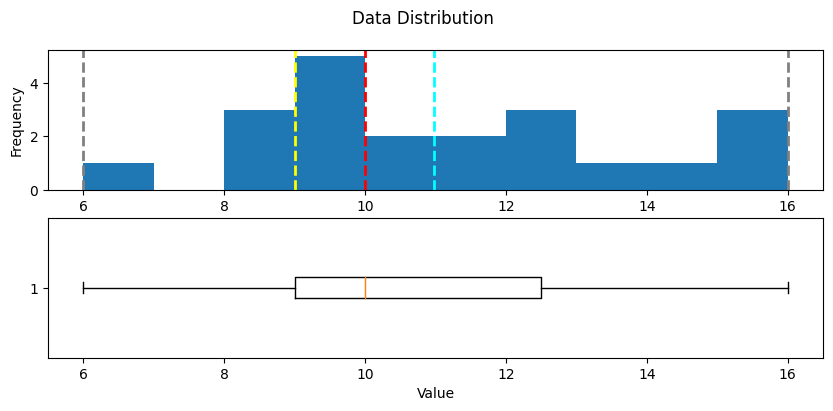

In [3]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

For learning purposes, we have just treated the value **1** as a true outlier here and excluded it. In the real world, it would be unusual to exclude data at the extremes without more justification when our sample size is so small. This is because the smaller our sample size, the more likely it is that our sampling is a bad representation of the whole population. (Here, the population means grades for all students, not just our 22.) For example, if we sampled study time for another 1,000 students, we might find that it's actually quite common to not study much!

When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas **quantile** function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



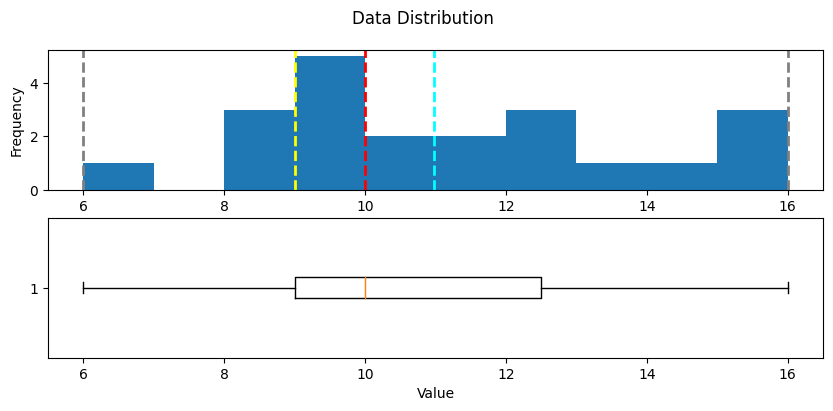

In [4]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

> **Tip**: You can also eliminate outliers at the upper end of the distribution by defining a threshold at a high percentile value. For example, you could use the **quantile** function to find the 0.99 percentile below which 99% of the data reside.

With the outliers removed, the box plot shows all data within the four quartiles. Note that the distribution is not symmetric like it is for the grade data. There are some students with very high study times of around 16 hours, but the bulk of the data is between 7 and 13 hours. The few extremely high values pull the mean towards the higher end of the scale.

Let's look at the density for this distribution.

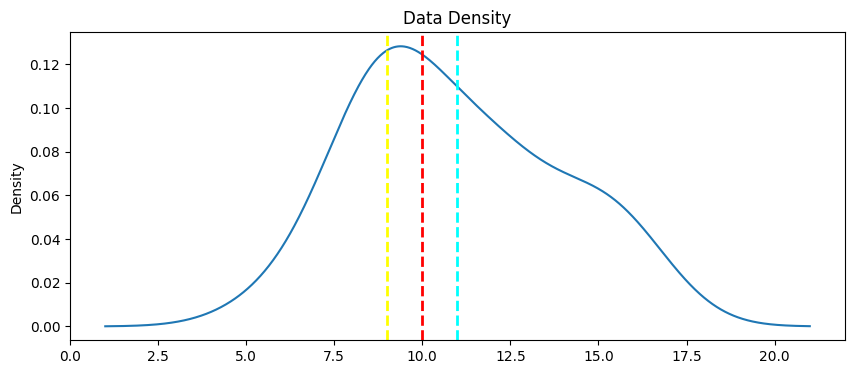

In [5]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

This kind of distribution is called *right skewed*. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

#### Measures of variance

So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine: how much variability is there in the data?

Typical statistics that measure variability in the data include:

- **Range**: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the **min** and **max** functions.
- **Variance**: The average of the squared difference from the mean. You can use the built-in **var** function to find this.
- **Standard Deviation**: The square root of the variance. You can use the built-in **std** function to find this.

In [6]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally the most useful. It provides a measure of variance in the data on the same scale as the data itself (so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean&#8212;in other words, the data is more spread out.

When working with a *normal* distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight. Run the cell below to see the relationship between standard deviations and the data in the normal distribution.

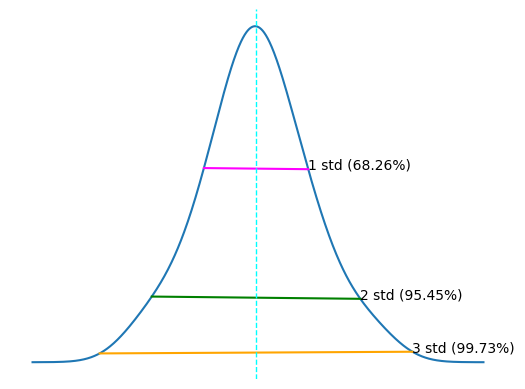

In [7]:
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:
- Approximately 68.26% of values fall within one standard deviation from the mean.
- Approximately 95.45% of values fall within two standard deviations from the mean.
- Approximately 99.73% of values fall within three standard deviations from the mean.

So, since we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal, we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92.

The descriptive statistics we've used to understand the distribution of the student data variables are the basis of statistical analysis. Because they're such an important part of exploring your data, there's a built-in `describe` method of the DataFrame object that returns the main descriptive statistics for all numeric columns.

In [8]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


## Comparing data

Now that you know something about the statistical distribution of the data in your dataset, you're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [9]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


### Comparing numeric and categorical variables

The data includes two *numeric* variables (**StudyHours** and **Grade**) and two *categorical* variables (**Name** and **Pass**). Let's start by comparing the numeric **StudyHours** column to the categorical **Pass** column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


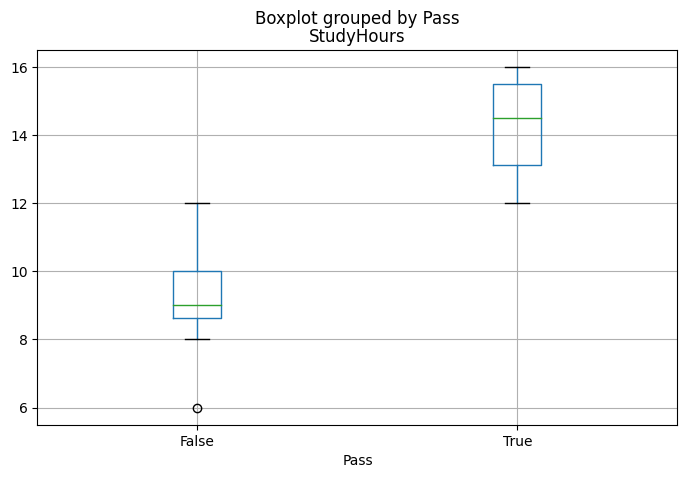

In [10]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

Comparing the StudyHours distributions, it's immediately apparent (if not particularly surprising) that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive indicator.

### Comparing numeric variables

Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

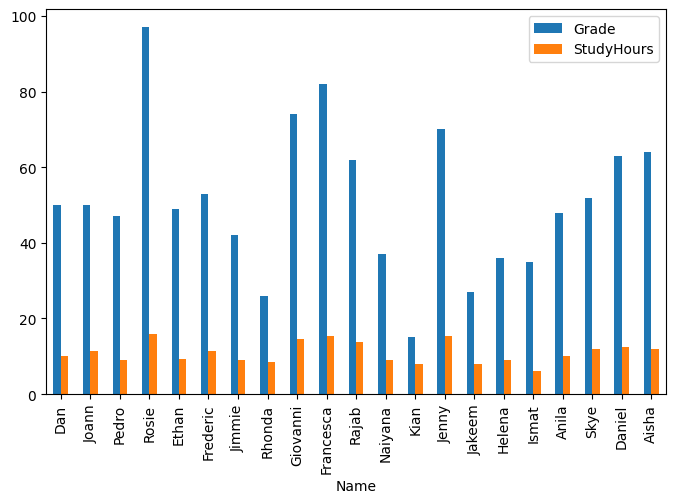

In [11]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. A grade is measured in grade points (and ranges from 3 to 97), and study time is measured in hours (and ranges from 1 to 16).

A common technique when dealing with numeric data in different scales is to *normalize* the data so that the values retain their proportional distribution but are measured on the same scale. To accomplish this, we'll use a technique called *MinMax* scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation, but the **Scikit-Learn** library provides a scaler to do it for you.

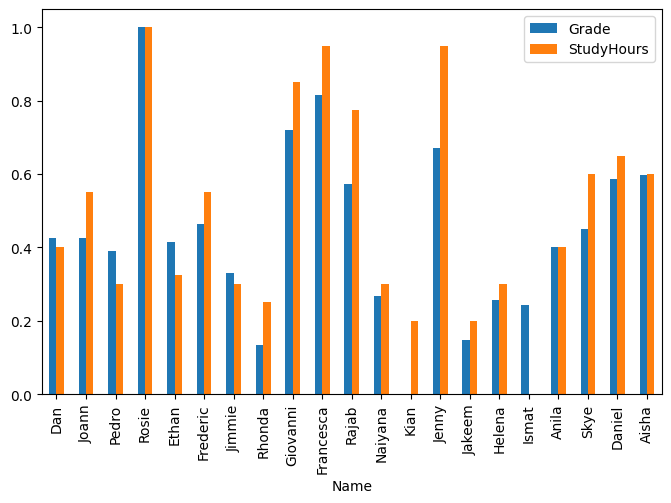

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.

So there seems to be a correlation between study time and grade. In fact, there's a statistical *correlation* measurement we can use to quantify the relationship between these columns.

In [13]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a *positive* correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a *negative* correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1, showing a strongly positive correlation between study time and grade.

> **Note**: Data scientists often quote the maxim "*correlation* is not *causation*". In other words, as tempting as it might be, you shouldn't interpret the statistical correlation as explaining *why* one of the values is high. In the case of the student data, the statistics demonstrate that students with high grades tend to also have high amounts of study time, but this is not the same as proving that they achieved high grades *because* they studied a lot. The statistic could equally be used as evidence to support the nonsensical conclusion that the students studied a lot *because* their grades were going to be high.

Another way to visualize the apparent correlation between two numeric columns is to use a *scatter* plot.

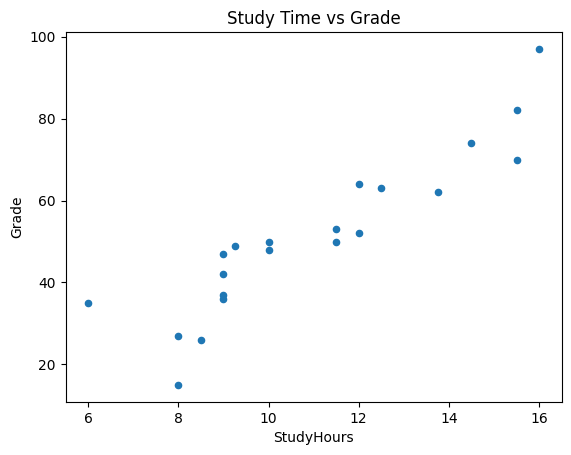

In [14]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

Again, it looks like there's a discernible pattern in which the students who studied the most hours are also the students who got the highest grades.

We can see this more clearly by adding a *regression* line (or a *line of best fit*) to the plot that shows the general trend in the data. To do this, we'll use a statistical technique called *least squares regression*.

Remember when you were learning how to solve linear equations in school, and recall that the *slope-intercept* form of a linear equation looks like this: 

$ y = mx + b $

In this equation, *y* and *x* are the coordinate variables, *m* is the slope of the line, and *b* is the y-intercept (where the line goes through the Y-axis).

In the case of our scatter plot for our student data, we already have our values for *x* (*StudyHours*) and *y* (*Grade*), so we just need to calculate the intercept and slope of the straight line that lies closest to those points. Then we can form a linear equation that calculates a new *y* value on that line for each of our *x* (*StudyHours*) values. To avoid confusion, we'll call this new *y* value *f(x)* (because it's the output from a linear equation ***f***unction based on *x*). The difference between the original *y* (*Grade*) value and the *f(x)* value is the *error* between our regression line and the actual *Grade* achieved by the student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.

Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors&#8212;hence the name *least squares regression*.

Fortunately, you don't need to code the regression calculation yourself. The **SciPy** package includes a **stats** class that provides a **linregress** method to do the hard work for you. This returns (among other things) the coefficients you need for the slope equation: slope (*m*) and intercept (*b*) based on a given pair of variable samples you want to compare.

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


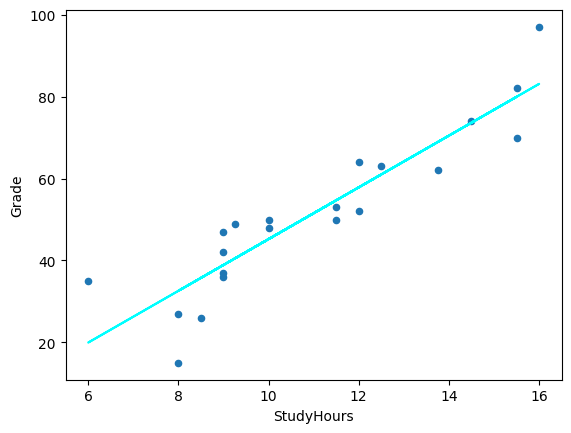

In [15]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

Note that this time, the code plotted two distinct things&#8212;the scatter plot of the sample study hours and grades is plotted as before, and then a line of best fit based on the least squares regression coefficients is plotted.

The slope and intercept coefficients calculated for the regression line are shown above the plot.

The line is based on the ***f*(x)** values calculated for each **StudyHours** value. Run the following cell to see a table that includes the following values:

- The **StudyHours** for each student.
- The **Grade** achieved by each student.
- The ***f(x)*** value calculated using the regression line coefficients.
- The *error* between the calculated ***f(x)*** value and the actual **Grade** value.

Some of the errors, particularly at the extreme ends, and quite large (up to over 17.5 grade points). But, in general, the line is pretty close to the actual grades.

In [16]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


### Using the regression coefficients for prediction

Now that you have the regression coefficients for the study time and grade relationship, you can use them in a function to estimate the expected grade for a given amount of study.

In [17]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


So by applying statistics to sample data, you've determined a relationship between study time and grade and encapsulated that relationship in a general function that can be used to predict a grade for a given amount of study time.

This technique is in fact the basic premise of machine learning. You can take a set of sample data that includes one or more *features* (in this case, the number of hours studied) and a known *label* value (in this case, the grade achieved) and use the sample data to derive a function that calculates predicted label values for any given set of features.

## Summary

Here we've looked at:

1. What an outlier is and how to remove them
2. How data can be skewed
3. How to look at the spread of data
4. Basic ways to compare variables, such as grades and study time 

## Further Reading

To learn more about the Python packages you explored in this notebook, see the following documentation:

- [NumPy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)
